In [1]:
import copy, math
import numpy as np
%matplotlib widget
import matplotlib.pyplot as plt
from lab_utils_common import  dlc, plot_data, plt_tumor_data, sigmoid, compute_cost_logistic
from plt_quad_logistic import plt_quad_logistic, plt_prob
plt.style.use('./deeplearning.mplstyle')

In [2]:
X_train = np.array([[0.5, 1.5], [1,1], [1.5, 0.5], [3, 0.5], [2, 2], [1, 2.5]])
y_train = np.array([0, 0, 0, 1, 1, 1])

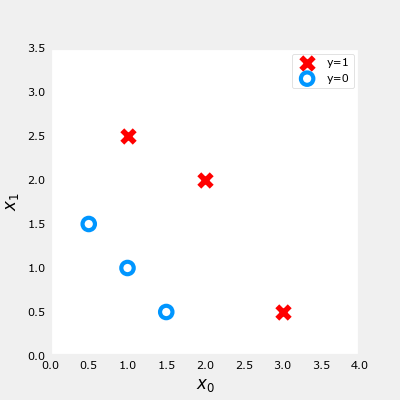

In [3]:
fig, ax = plt.subplots(1,1,figsize=(4,4))
plot_data(X_train, y_train, ax)

ax.axis([0, 4, 0, 3.5])
ax.set_ylabel('$x_1$', fontsize=12)
ax.set_xlabel('$x_0$', fontsize=12)
plt.show()

In [15]:
def compute_cost_logistic(X, y, w, b):
    m = X.shape[0]
    cost = 0.
    for i in range(m):
        z_i = np.dot(X[i], w) + b
        f_wb_i = sigmoid(z_i)
        cost += -y[i]*np.log(f_wb_i) + (1 - y[i])*np.log(1 - f_wb_i)
    cost /= m
    return cost

In [11]:
def compute_gradient_logistic(X, y, w, b):
    """
    Computes the gradient for linear regression

    Args:
      X (ndarray (m,n): Data, m examples with n features
      y (ndarray (m,)): target values
      w (ndarray (n,)): model parameters
      b (scalar)      : model parameter
    Returns
      dj_dw (ndarray (n,)): The gradient of the cost w.r.t. the parameters w.
      dj_db (scalar)      : The gradient of the cost w.r.t. the parameter b.
    """
    m,n = X.shape
    dj_dw = np.zeros((n,))
    dj_db = 0.

    for i in range(m):
        z_i = np.dot(X[i], w) + b
        f_wb_i = sigmoid(z_i)
        err_i = f_wb_i - y[i]
        for j in range(n):
            dj_dw[j] += err_i * X[i, j]
        dj_db += err_i
    dj_dw /= m
    dj_db /= m
    return dj_db, dj_dw

In [12]:
# check implementation of gradient function
X_tmp = np.array([[0.5, 1.5], [1,1], [1.5, 0.5], [3, 0.5], [2, 2], [1, 2.5]])
y_tmp = np.array([0, 0, 0, 1, 1, 1])
w_tmp = np.array([2., 3.])
b_tmp = 1.
dj_db_tmp, dj_dw_tmp = compute_gradient_logistic(X_tmp, y_tmp, w_tmp, b_tmp)
print(f"dj_dw: {dj_dw_tmp.tolist()}")
print(f"dj_db: {dj_db_tmp}")

dj_dw: [0.498333393278696, 0.49883942983996693]
dj_db: 0.49861806546328574


In [13]:
def gradient_descent(X, y, w_in, b_in, num_iters, alpha, cost_function, gradient_function):
    """
    Performs batch gradient descent

    Args:
      X (ndarray (m,n)   : Data, m examples with n features
      y (ndarray (m,))   : target values
      w_in (ndarray (n,)): Initial values of model parameters
      b_in (scalar)      : Initial values of model parameter
      alpha (float)      : Learning rate
      num_iters (scalar) : number of iterations to run gradient descent

    Returns:
      w (ndarray (n,))   : Updated values of parameters
      b (scalar)         : Updated value of parameter
    """
    J_history = []
    w = copy.deepcopy(w_in)
    b = b_in

    for i in range(num_iters):
        dj_db, dj_dw = gradient_function(X, y, w, b)

        w = w - alpha * dj_dw
        b = b - alpha * dj_db

        if i < 10000:
            J_history.append(cost_function(X, y, w, b))
        if i % math.ceil(num_iters / 10) == 0:
            print(f"Iteration {i:4d}: Cost {J_history[-1]}")

    return w, b, J_history

In [16]:
# run gradient descent
w_tmp = np.zeros_like(X_train[0])
b_tmp = 0.
alpha = 0.1
iters = 10000

w_out, b_out, J_hist = gradient_descent(X_train, y_train, w_tmp, b_tmp, iters, alpha,
                                         compute_cost_logistic, compute_gradient_logistic)
print(f"\nupdated parameters: w:{w_out}, b:{b_out}")
print(f"\ncost history: J: {J_hist}")

Iteration    0: Cost -0.0295884896555302
Iteration 1000: Cost -0.037926624638293334
Iteration 2000: Cost -0.01922236625832473
Iteration 3000: Cost -0.012748858234447468
Iteration 4000: Cost -0.009509172636424612
Iteration 5000: Cost -0.00757288922629322
Iteration 6000: Cost -0.006287710518824484
Iteration 7000: Cost -0.005373472046207591
Iteration 8000: Cost -0.004690271115497643
Iteration 9000: Cost -0.004160574078975072

updated parameters: w:[5.28 5.08], b:-14.222409982019837

cost history: J: [-0.0295884896555302, -0.054724854414522295, -0.07610752591797072, -0.09432065212939439, -0.10985181207632733, -0.12310805733005913, -0.13442975341506014, -0.14410219972499402, -0.15236523359808168, -0.15942110226157682, -0.16544089101335407, -0.17056976866572782, -0.17493127325666044, -0.17863082254039178, -0.1817585991351444, -0.18439193081478522, -0.18659726228963722, -0.18843179536358165, -0.18994485884241977, -0.19117905727510845, -0.19217123789244603, -0.19295330742970004, -0.19355292444

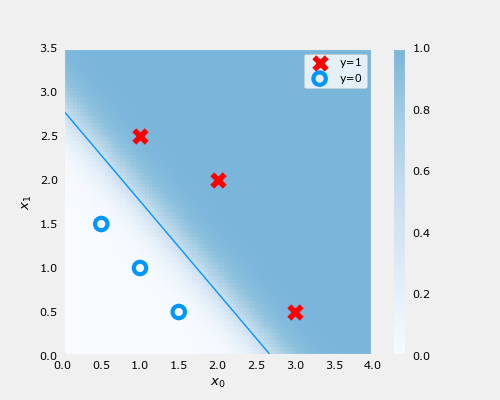

In [17]:
# plot data
fig, ax = plt.subplots(1,1,figsize=(5,4))
plt_prob(ax, w_out, b_out)

# Plot the original data
ax.set_ylabel(r'$x_1$')
ax.set_xlabel(r'$x_0$')
ax.axis([0, 4, 0, 3.5])
plot_data(X_train,y_train,ax)

# Plot the decision boundary
x0 = -b_out/w_out[0]
x1 = -b_out/w_out[1]
ax.plot([0,x0],[x1,0], c=dlc["dlblue"], lw=1)
plt.show()